In [1260]:
# import libraries
import pandas as pd
import numpy as np

import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

# Suppress Scientific Notation in Numpy
np.set_printoptions(suppress=True)

# Suppress Scientific Notation in Pandas
pd.set_option('display.float_format', '{:.2f}'.format)

import scipy.stats as stats
from scipy.special import inv_boxcox

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
# Classfication
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import os
import glob

import nltk
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [1261]:

data_df = pd.read_csv(r"C:\Data\dataframe_.csv")

In [1262]:
data_df

,input,output
0,-122.74,-130.57
1,-121.53,-129.94
2,-134.92,-130.14
3,-120.61,-125.76
4,-129.89,-112.79
...,...,...
1692,25.41,-76.38
1693,29.54,-82.80
1694,31.63,-87.00
1695,29.09,-104.94


In [1263]:
# check duplicates
data_df.duplicated().value_counts()

False    1091
True      606
dtype: int64

In [1264]:
data_df.drop_duplicates(keep = 'first', inplace=True)

In [1265]:
data_df.shape

(1091, 2)

In [1266]:
data_df.isna()

,input,output
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1107,False,False
1108,False,False
1109,False,False
1110,False,False


In [1267]:
input_med = data_df.input.median()

In [1268]:
data_df.input = data_df.input.fillna(input_med)

In [1269]:
out_med = data_df.output.median()

In [1270]:
data_df.output = data_df.output.fillna(out_med)

In [1271]:
data_df.isna().sum()

input     0
output    0
dtype: int64

In [1272]:
data_df.skew()

input    -0.28
output    0.92
dtype: float64

In [1273]:
data_df.shape

(1091, 2)

# Treating Outliers

### Cube Root transformation

In [1274]:
# data_df['output'] =data_df.output**(1/3)

In [1275]:
#(data_df.output**(1/3)).skew()
#data_df.output.skew()

In [1276]:
# output_mean = data_df.output.mean()

In [1277]:
# data_df.output = data_df.output.fillna(output_mean)

In [1278]:
# reverse the cube root transformation
# data_df['output'] = (data_df.output**(1/3))**3

### Log Transformation

In [ ]:
#np.log(data_df.output)

In [ ]:
#sns.boxplot(np.log(data_df.output));

In [ ]:
# Log transformation seems to be fitting well for this data

# compare the variance
#data_df.output.var()

#np.log(data_df.output).var()

In [ ]:
# store the log  values as a new column
# data_df['output_log'] = np.log(data_df.output)

In [1279]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091 entries, 0 to 1439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1091 non-null   float64
 1   output  1091 non-null   float64
dtypes: float64(2)
memory usage: 25.6 KB


In [1280]:
data_df

,input,output
0,-122.74,-130.57
1,-121.53,-129.94
2,-134.92,-130.14
3,-120.61,-125.76
4,-129.89,-112.79
...,...,...
1107,-119.95,123.61
1108,-109.94,127.20
1109,-111.52,128.17
1110,-110.34,123.09


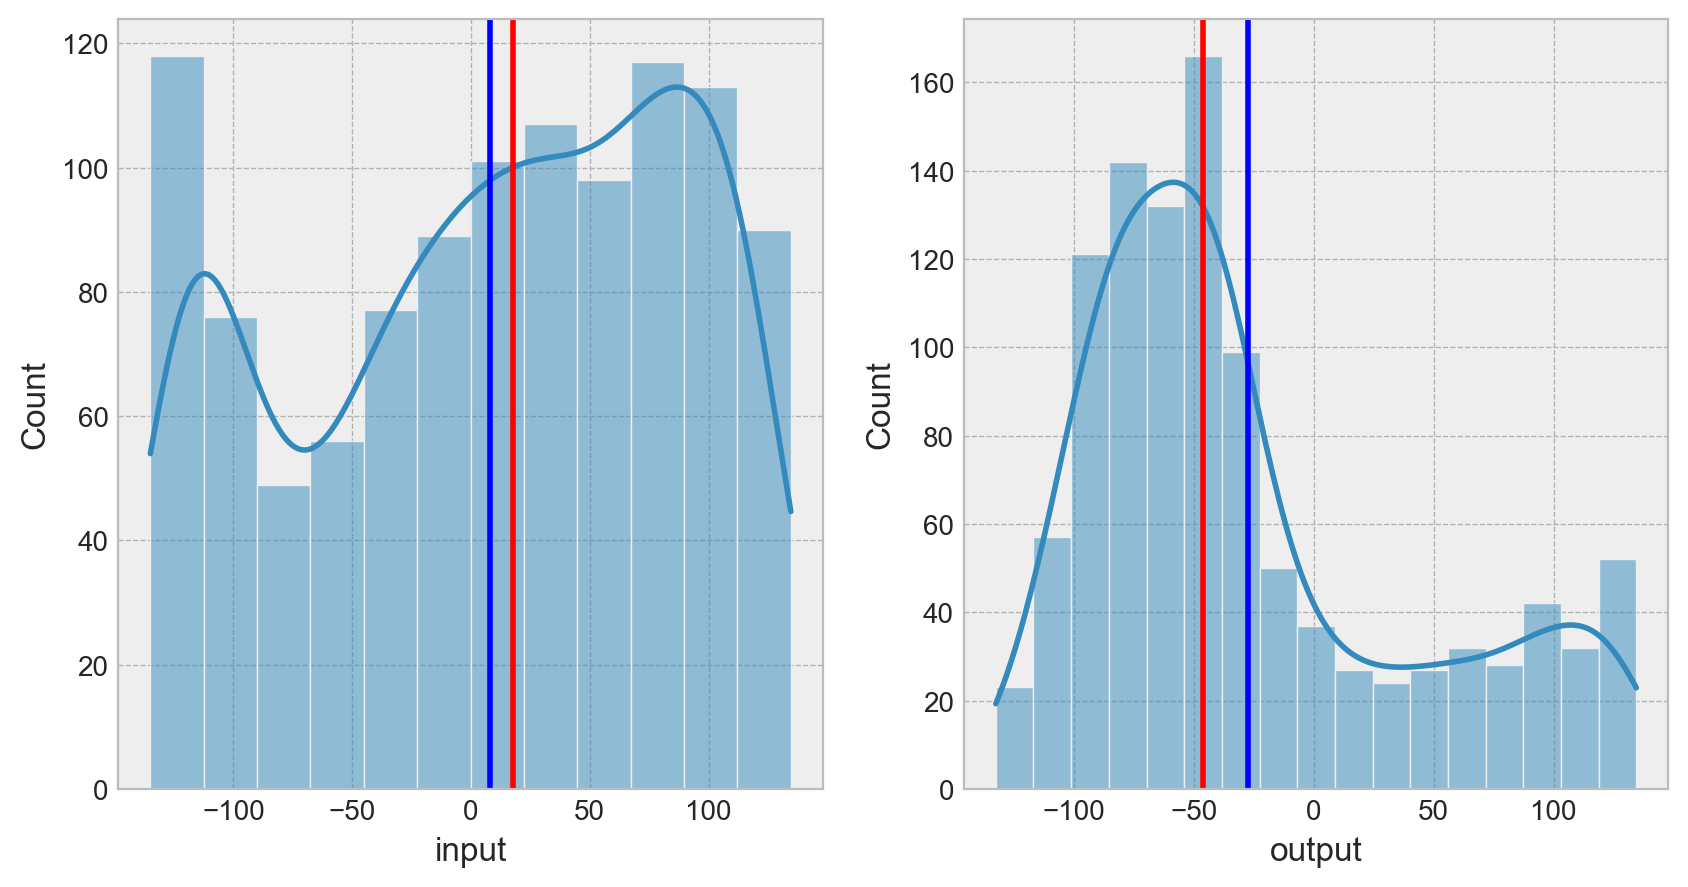

In [1281]:
plt.figure(figsize=(10,5))

plt.subplot(121)

# input
sns.histplot(data_df.input , kde = True);
plt.axvline(data_df.input.mean(), color = 'blue');
plt.axvline(data_df.input.median(), color = 'red');

plt.subplot(122)
sns.histplot(data_df.output, kde = True);
plt.axvline(data_df.output.mean(), color = 'blue');
plt.axvline(data_df.output.median(), color = 'red');

### A - Identify the Target Variable and Splitting the Data into Train and Test

In [1282]:
# Identifying the inputs (X) and output (y)
y = data_df['output']
X = data_df[['input']]

In [1283]:
X.shape
y.shape
X.head()
y.head()

(1091, 1)

(1091,)

,input
0,-122.74
1,-121.53
2,-134.92
3,-120.61
4,-129.89


0   -130.57
1   -129.94
2   -130.14
3   -125.76
4   -112.79
Name: output, dtype: float64

In [1284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 777)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(818, 1) (818,)
(273, 1) (273,)


### B. Separating Categorical and Numerical Columns:

In [1285]:
X_train.head()
X_train.dtypes

,input
546,83.10
256,55.48
849,-113.96
798,-102.53
488,104.77


input    float64
dtype: object

In [1286]:
X_train_num = X_train.select_dtypes(include='float64')

X_train_num.head()

,input
546,83.10
256,55.48
849,-113.96
798,-102.53
488,104.77


### C. Scaling the Numerical Features

In [1287]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,input
546,0.93
256,0.58
849,-1.58
798,-1.44
488,1.21


In [1288]:
X_train_num_rescaled.describe()
X_train_num.describe()

,input
count,818.00
mean,-0.00
std,1.00
min,-1.85
25%,-0.76
50%,0.11
75%,0.85
max,1.59


,input
count,818.00
mean,10.00
std,78.41
min,-134.92
25%,-49.30
50%,18.63
75%,76.63
max,134.61


In [1289]:
print("Number of Numerical Features:", scaler.n_features_in_)
print('--'*50)
print("Mean of each column:", scaler.mean_)
print('--'*50)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 1
----------------------------------------------------------------------------------------------------
Mean of each column: [9.99929248]
----------------------------------------------------------------------------------------------------
Std of each column: [78.3580544]


In [1290]:
X_train_transformed = X_train_num_rescaled

X_train_transformed.head()

,input
546,0.93
256,0.58
849,-1.58
798,-1.44
488,1.21


### G. Preparing Test Data

In [1291]:
X_test.head()
X_test.info()

,input
55,-108.60
524,96.90
987,36.13
56,-96.69
592,35.98


<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 55 to 120
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   273 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [1292]:
# Numerical Data
X_test_num = X_test.select_dtypes(include=['float64'])

X_test_num.head()

,input
55,-108.60
524,96.90
987,36.13
56,-96.69
592,35.98


In [1293]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,input
55,-1.51
524,1.11
987,0.33
56,-1.36
592,0.33


In [1294]:
X_test_transformed = X_test_num_rescaled

X_test_transformed.head()

,input
55,-1.51
524,1.11
987,0.33
56,-1.36
592,0.33


## Linear Regression

In [1295]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [1296]:
y_test_pred = regressor.predict(X_test_transformed)

In [1297]:
data_LR = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

data_LR.head()

,Actual,Predicted
55,-53.58,-78.53
524,41.04,12.31
987,-49.66,-14.56
56,-50.95,-73.27
592,-57.45,-14.62


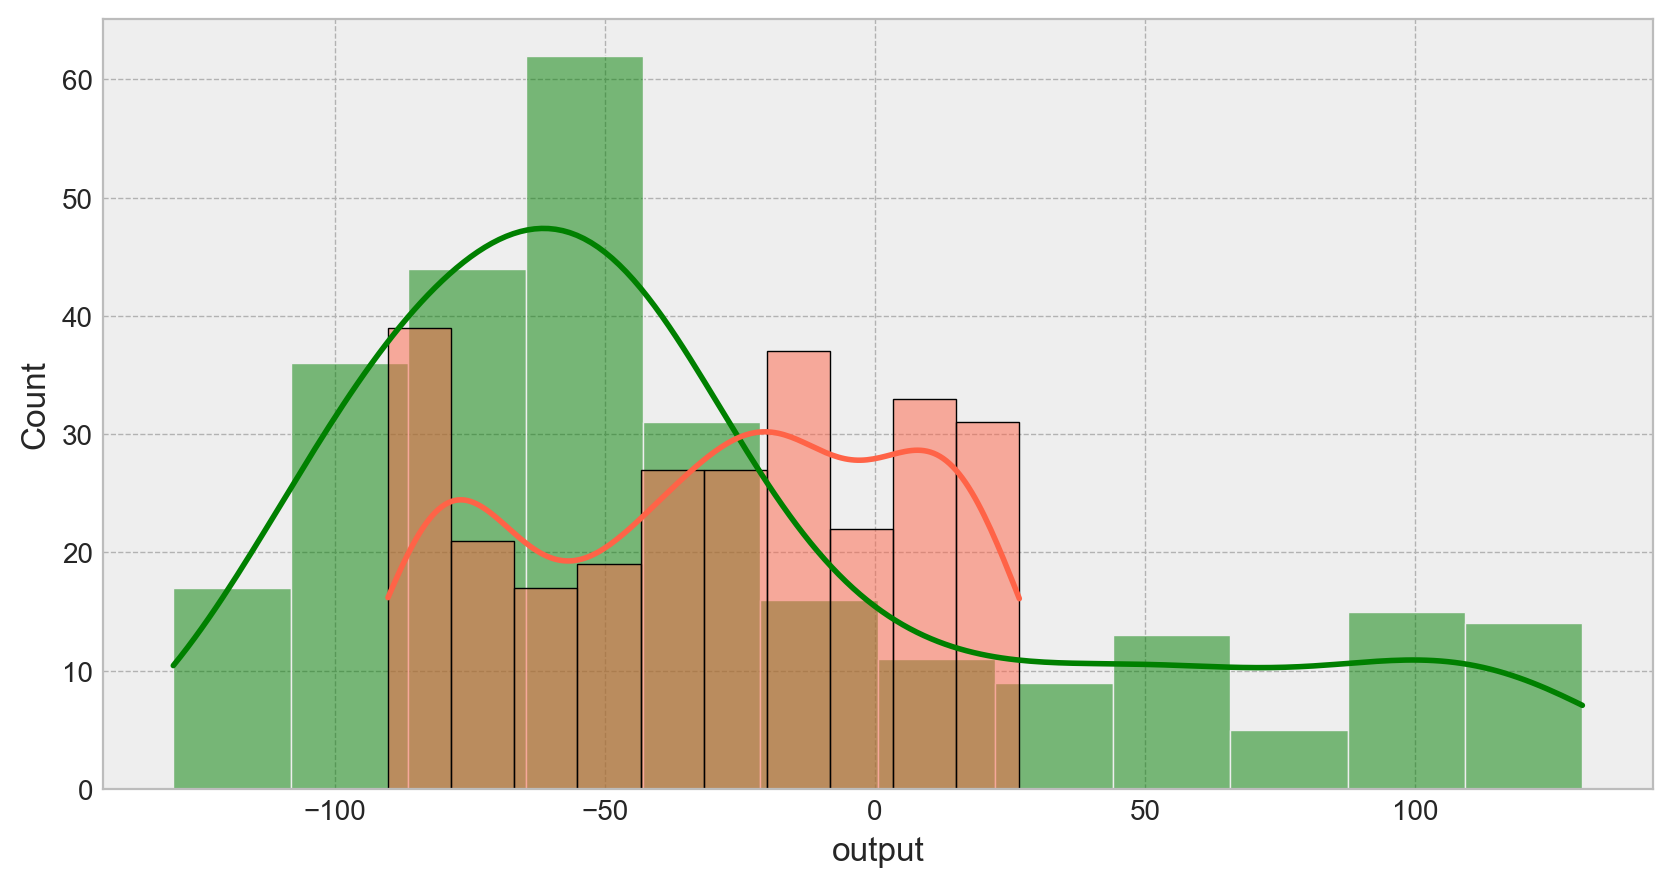

In [1298]:
plt.figure(figsize=(10,5), dpi = 100)
sns.histplot(y_test, color='green', kde = True);
sns.histplot(y_test_pred, color='tomato', kde = True, ec='black');

In [1299]:
A = metrics.mean_absolute_error(y_test, y_test_pred)
a =  metrics.r2_score(y_test, y_test_pred)

In [1300]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('R Squared Error: ', metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error:  43.80672888446855
Mean Squared Error:  3259.919452150959
Root Mean Squared Error:  57.09570432310087
R Squared Error:  0.25723085935730816


## KNN Regression

In [1301]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [1302]:
y_test_pred = regressor.predict(X_test_transformed)

In [1303]:
data_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

data_KNN.head()

,Actual,Predicted
55,-53.58,-64.64
524,41.04,51.90
987,-49.66,-65.92
56,-50.95,-46.97
592,-57.45,-65.92


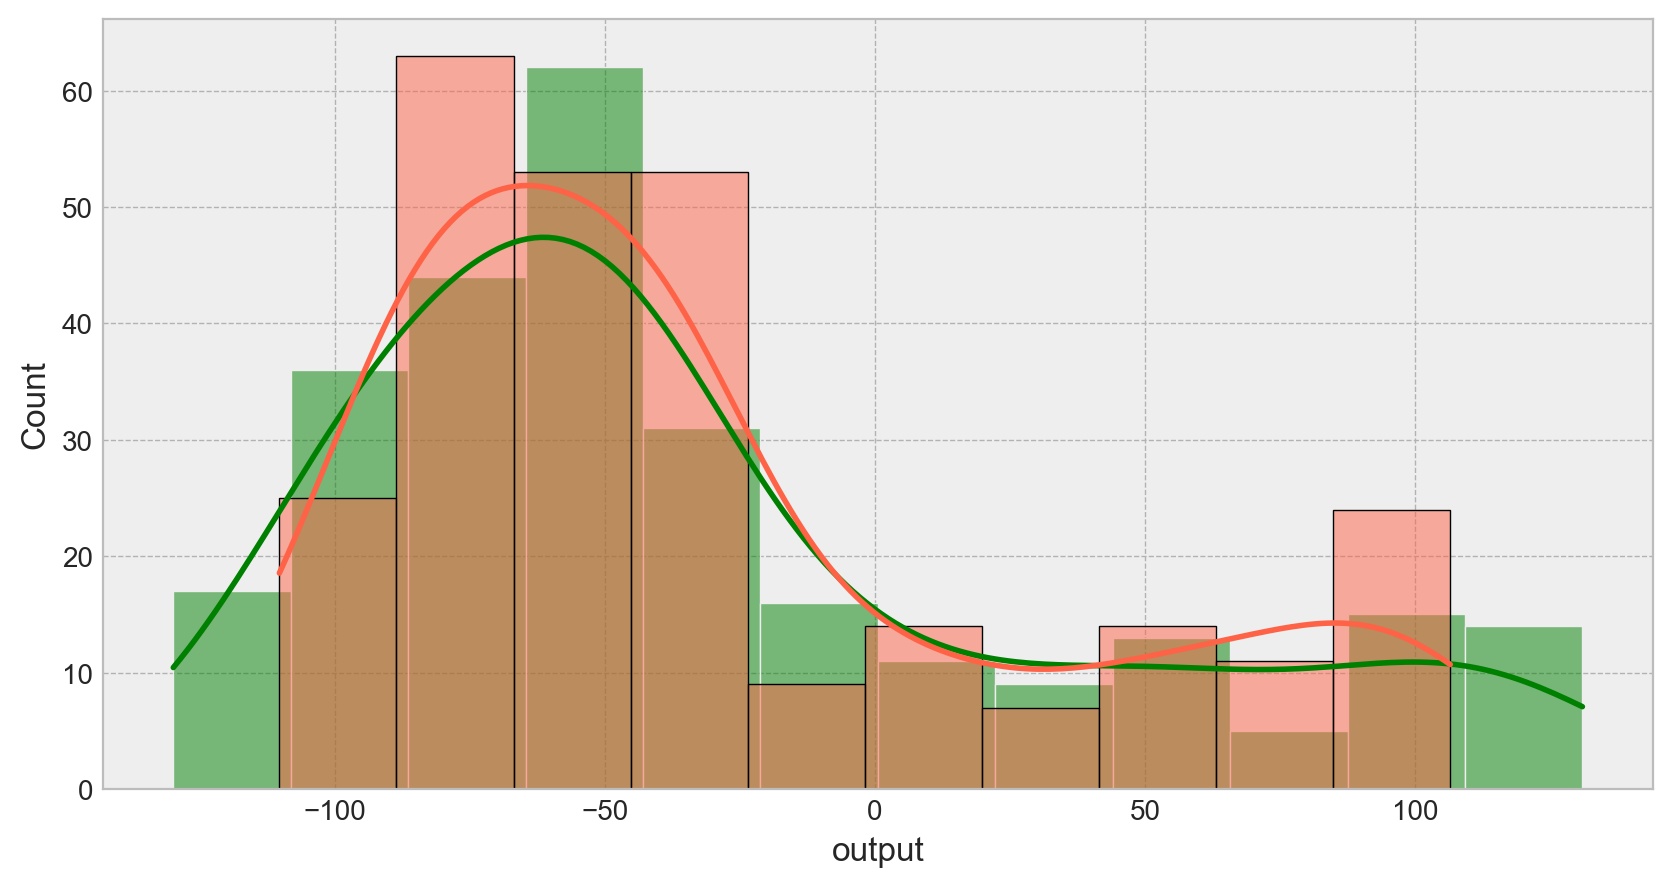

In [1304]:
plt.figure(figsize=(10,5), dpi = 100)
sns.histplot(y_test, color='green', kde = True);
sns.histplot(y_test_pred, color='tomato', kde = True, ec='black');

In [1305]:
B = metrics.mean_absolute_error(y_test, y_test_pred)

In [1306]:
b =  metrics.r2_score(y_test, y_test_pred)

In [1307]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('R Squared Error: ', metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error:  24.30079548898315
Mean Squared Error:  1460.172000534328
Root Mean Squared Error:  38.21219701265982
R Squared Error:  0.6673013803111663


## Decision Tree Regression

In [1308]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [1309]:
y_test_pred = regressor.predict(X_test_transformed)

In [1310]:
data_DT = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

data_DT.head()

,Actual,Predicted
55,-53.58,-96.22
524,41.04,41.00
987,-49.66,-73.60
56,-50.95,-54.10
592,-57.45,-92.58


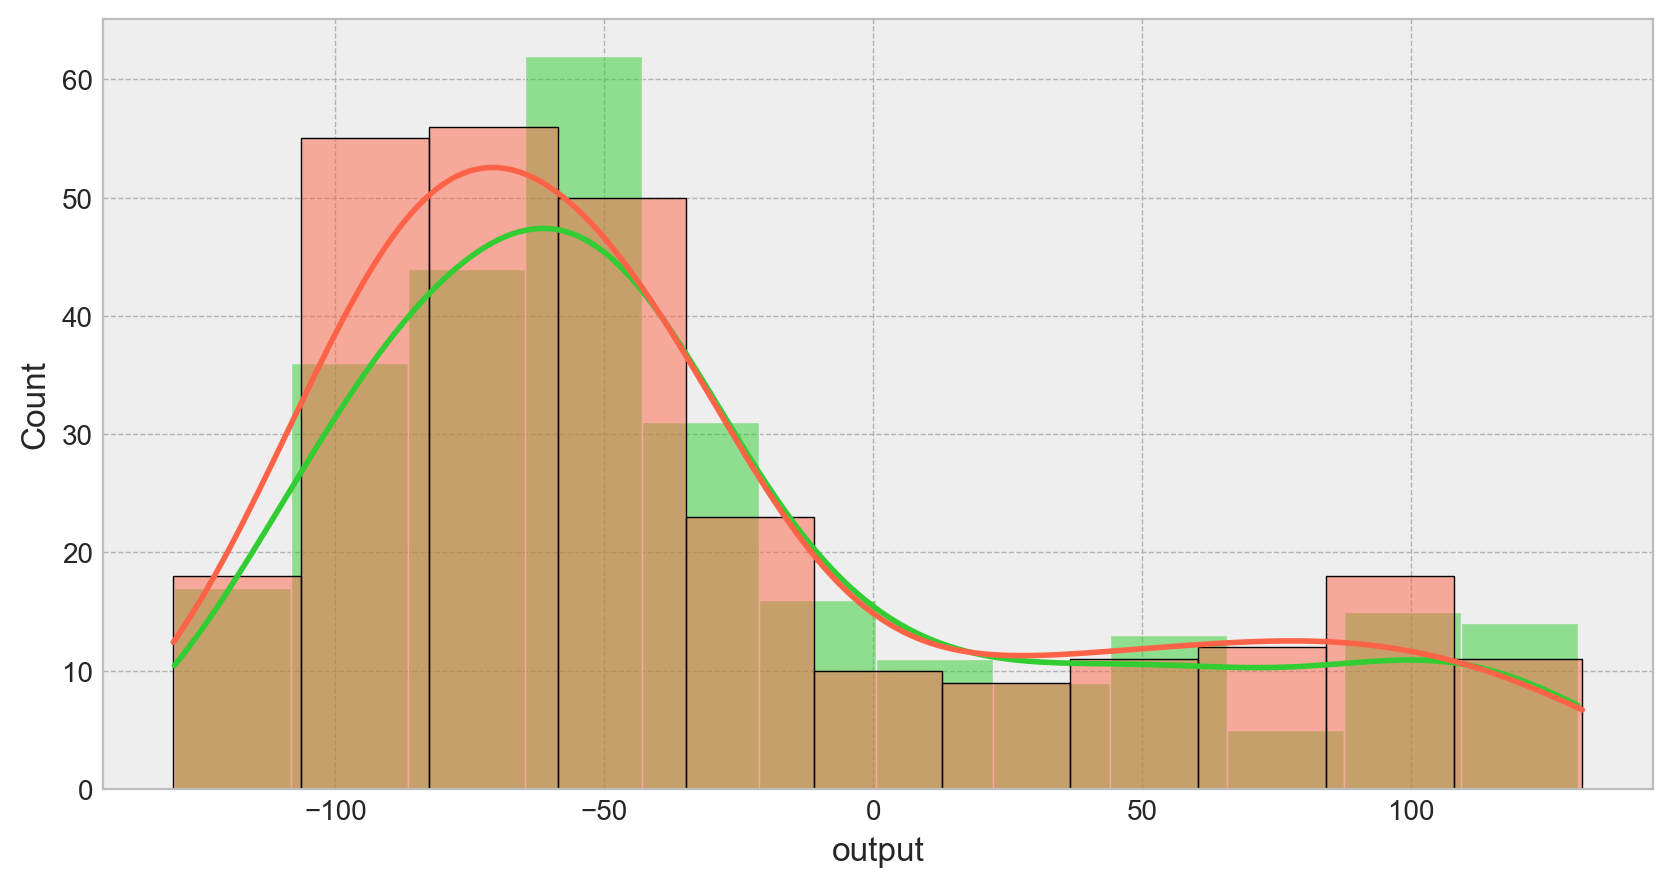

In [1311]:
plt.figure(figsize=(10,5), dpi = 100)
sns.histplot(y_test, color='limegreen', kde = True);
sns.histplot(y_test_pred, color='tomato', kde = True,ec='black');

In [1312]:
C = metrics.mean_absolute_error(y_test, y_test_pred)
c =  metrics.r2_score(y_test, y_test_pred)

In [1313]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('R Squared Error: ', metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error:  27.652678086334557
Mean Squared Error:  1910.071502030532
Root Mean Squared Error:  43.704364793811294
R Squared Error:  0.5647922628293163


### Support Vector Regressor

In [1314]:
SVregressor = SVR()
SVregressor.fit(X_train_transformed, y_train)

SVR()

In [1315]:
y_test_pred = SVregressor.predict(X_test_transformed)

In [1316]:
data_SV = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

data_SV.head()

,Actual,Predicted
55,-53.58,-50.60
524,41.04,28.97
987,-49.66,-68.76
56,-50.95,-45.75
592,-57.45,-68.90


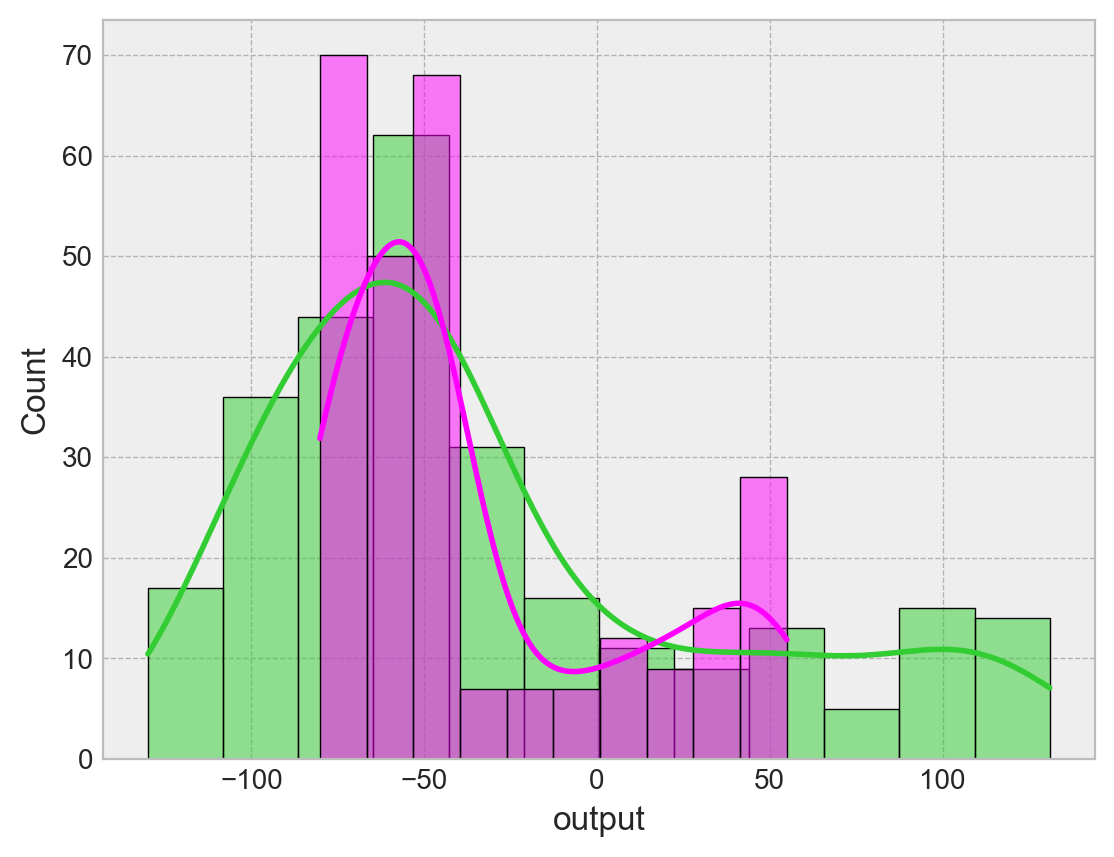

In [1317]:
sns.histplot(y_test, color='limegreen', kde = True,ec='black');
sns.histplot(y_test_pred, color='magenta', kde = True,ec='black');

In [1318]:
D = metrics.mean_absolute_error(y_test, y_test_pred)
d =  metrics.r2_score(y_test, y_test_pred)

In [1319]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('R Squared Error: ', metrics.r2_score(y_test, y_test_pred))


Mean Absolute Error:  24.77962276603314
Mean Squared Error:  1507.8450216363076
Root Mean Squared Error:  38.83098017867058
R Squared Error:  0.6564391337325295


## Random Forest Regression

In [1320]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [1321]:
y_test_pred = regressor.predict(X_test_transformed)

In [1322]:
data_RF = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

data_RF.head()

,Actual,Predicted
55,-53.58,-90.60
524,41.04,47.46
987,-49.66,-73.72
56,-50.95,-49.91
592,-57.45,-84.83


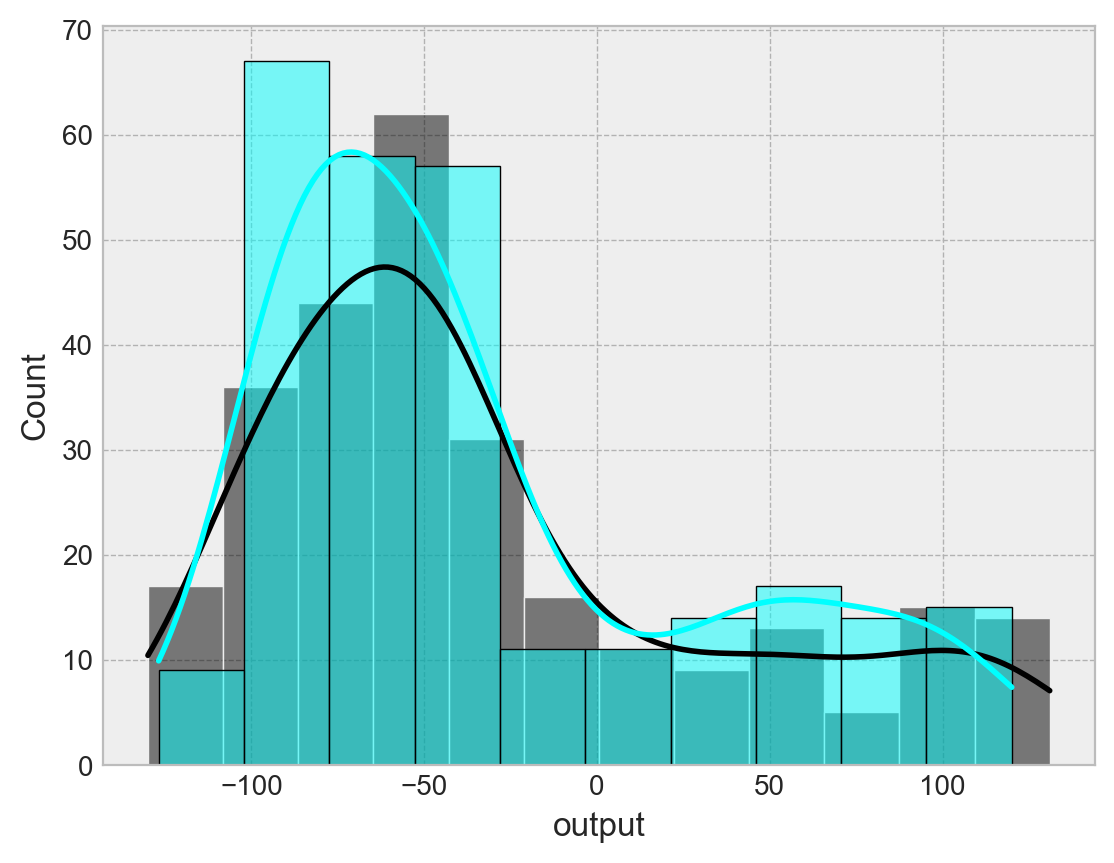

In [1323]:
sns.histplot(y_test, color='black', kde = True);
sns.histplot(y_test_pred, color='cyan', kde = True,ec='black');

In [1324]:
E = metrics.mean_absolute_error(y_test, y_test_pred)

In [1325]:
e =  metrics.r2_score(y_test, y_test_pred)

In [1326]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('R Squared Error: ', metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error:  24.959911809066117
Mean Squared Error:  1480.4619476757732
Root Mean Squared Error:  38.476771533949844
R Squared Error:  0.6626783376798544


## GB Boosting Regressor

In [1327]:
from sklearn.ensemble import GradientBoostingRegressor
GBregressor = GradientBoostingRegressor()
GBregressor.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [1328]:
y_test_pred = GBregressor.predict(X_test_transformed)

In [1329]:
data_GB = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

data_GB.head()

,Actual,Predicted
55,-53.58,-56.97
524,41.04,41.39
987,-49.66,-71.27
56,-50.95,-42.99
592,-57.45,-72.15


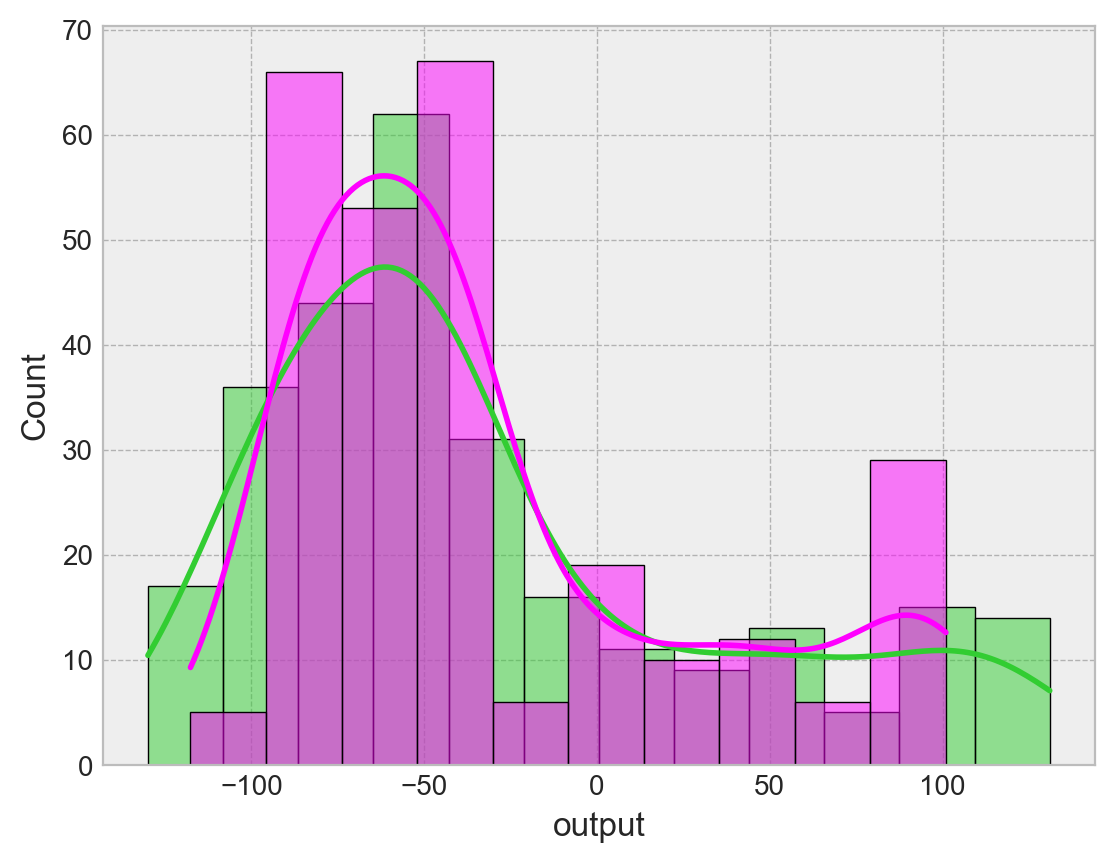

In [1330]:
sns.histplot(y_test, color='limegreen', kde = True,ec='black');
sns.histplot(y_test_pred, color='magenta', kde = True,ec='black');

In [1331]:
F = metrics.mean_absolute_error(y_test, y_test_pred)
f =  metrics.r2_score(y_test, y_test_pred)

In [1332]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('R Squared Error: ', metrics.r2_score(y_test, y_test_pred))


Mean Absolute Error:  22.129162354783226
Mean Squared Error:  1243.5726741575363
Root Mean Squared Error:  35.26432580041105
R Squared Error:  0.716653303841216


### ADA Boost Regressor

In [1333]:
ADBregressor = AdaBoostRegressor()
ADBregressor.fit(X_train_transformed, y_train)

AdaBoostRegressor()

In [1334]:
y_test_pred = regressor.predict(X_test_transformed)

In [1335]:
medical_AD = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

medical_AD.head()

,Actual,Predicted
55,-53.58,-90.60
524,41.04,47.46
987,-49.66,-73.72
56,-50.95,-49.91
592,-57.45,-84.83


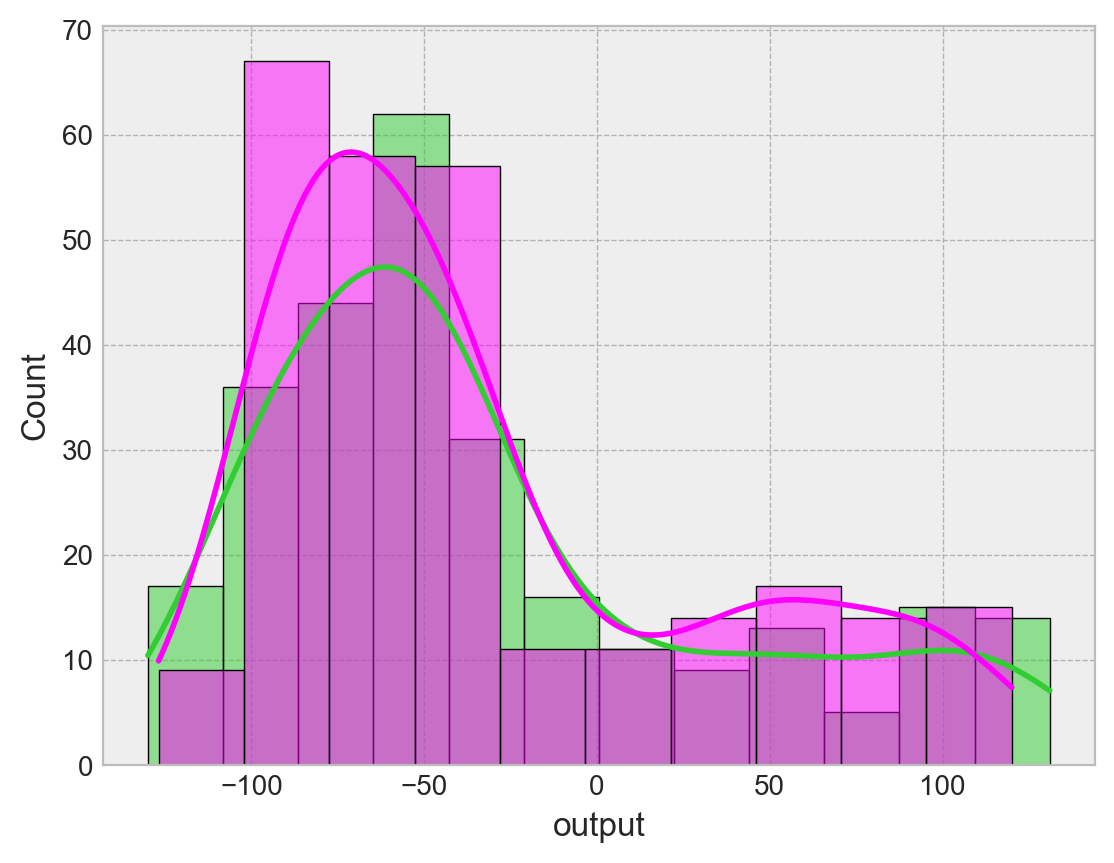

In [1336]:
sns.histplot(y_test, color='limegreen', kde = True,ec='black');
sns.histplot(y_test_pred, color='magenta', kde = True,ec='black');

In [1337]:
G = metrics.mean_absolute_error(y_test, y_test_pred)

In [1338]:
g =  metrics.r2_score(y_test, y_test_pred)

In [1339]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('R Squared Error: ', metrics.r2_score(y_test, y_test_pred))


Mean Absolute Error:  24.959911809066117
Mean Squared Error:  1480.4619476757732
Root Mean Squared Error:  38.476771533949844
R Squared Error:  0.6626783376798544


In [1344]:
Final = {"Algorithm": ["Linear Regression", " KNN Regression", " DT Regression","Support Vector Regression",
                         "Random Forest Regressor", "Gradient-Boosting Regressor","AdaBoostRegressor"],
           "Regression": ["Simple", "K-Nearest", "Decision-Tree","SVR", "Ensemble", "Boosting","Boosting"],
           "Mean Absolute Error": [A,B,C,D,E,F,G],
            "R^2":[a,b,c,d,e,f,g],
           "Ranking": [6,2,5,3,4,1,4]}

In [1345]:
Final_output = pd.DataFrame(Final)

In [1346]:
Final_output

,Algorithm,Regression,Mean Absolute Error,R^2,Ranking
0,Linear Regression,Simple,43.81,0.26,6
1,KNN Regression,K-Nearest,24.30,0.67,2
2,DT Regression,Decision-Tree,27.65,0.56,5
3,Support Vector Regression,SVR,24.78,0.66,3
4,Random Forest Regressor,Ensemble,24.96,0.66,4
5,Gradient-Boosting Regressor,Boosting,22.13,0.72,1
6,AdaBoostRegressor,Boosting,24.96,0.66,4


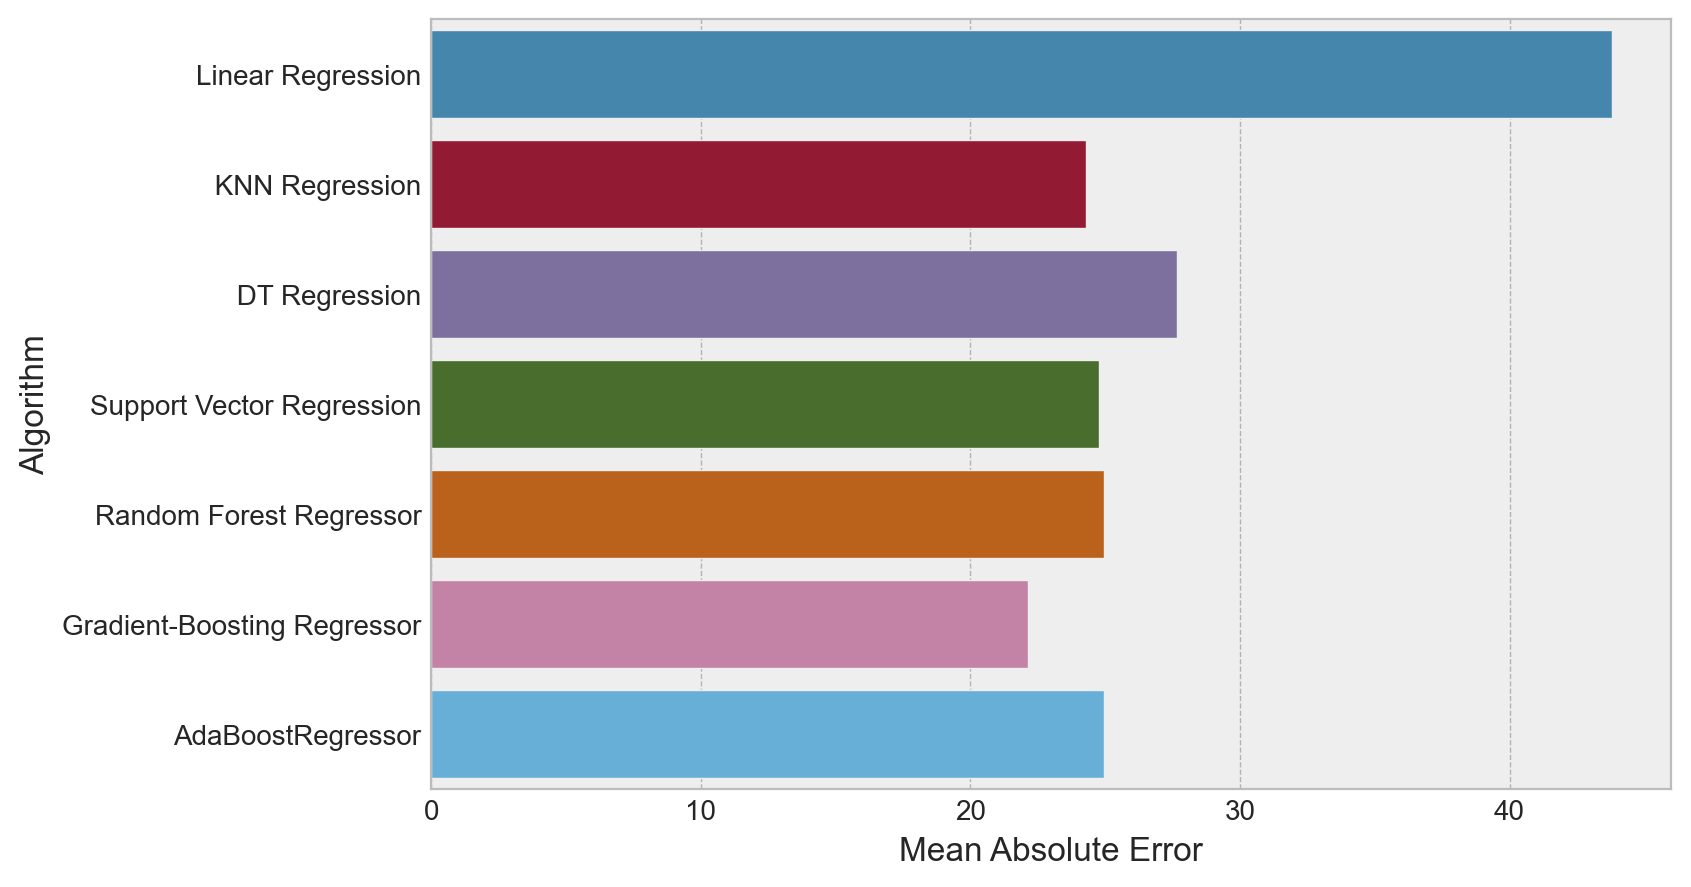

In [1343]:
plt.figure(figsize=(8,5))
sns.barplot( x = 'Mean Absolute Error',y ='Algorithm' , data = Final_output,orient ='h');

## Conclusion

*  The results of the evaluation using mean absolute error as the metric show that **`Gradient-Boosting`** outperformed the other models, with a score of **22.13** and also R^2 also suggesting upto `72%`

`KNN` had the second-best performance, with a score of **24.30**


####  These results suggest that **`GB-Model`** may be the most effective model for this particular task, 
      Although further evaluation and validation is necessary to confirm this conclusion.

### Polynomial Regression

In [1347]:

from sklearn.preprocessing import PolynomialFeatures

# Transform the features to polynomial
poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

# Train the model
reg = LinearRegression().fit(X_train, y_train)

# Evaluate the model
r2 = reg.score(X_test, y_test)
print("R^2:", r2)


R^2: 0.5980465352356251


In [1348]:

# Train the model
reg = LinearRegression().fit(X_train, y_train)

# Evaluate the model
r2 = reg.score(X_test, y_test)
n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R-squared:", adjusted_r2)


Adjusted R-squared: 0.5935637828404834
